<a href="https://colab.research.google.com/github/vaasminion/Bubblesort-Visualization/blob/master/Matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install matplot
from google.colab import drive
drive.mount('/content/drive')
path_followerlist = r'C:\Users\Deepak\Downloads\followerlist\followerlist.csv'
path_unfollowerlist = r'C:\Users\Deepak\Downloads\followerlist\unfollowerlist.csv'
path_followerlist = r'/content/drive/MyDrive/Colab Notebooks/followerlist.csv'
path_unfollowerlist = r'/content/drive/MyDrive/Colab Notebooks/unfollowerlist.csv'
output = r'/content/drive/MyDrive/Colab Notebooks/'

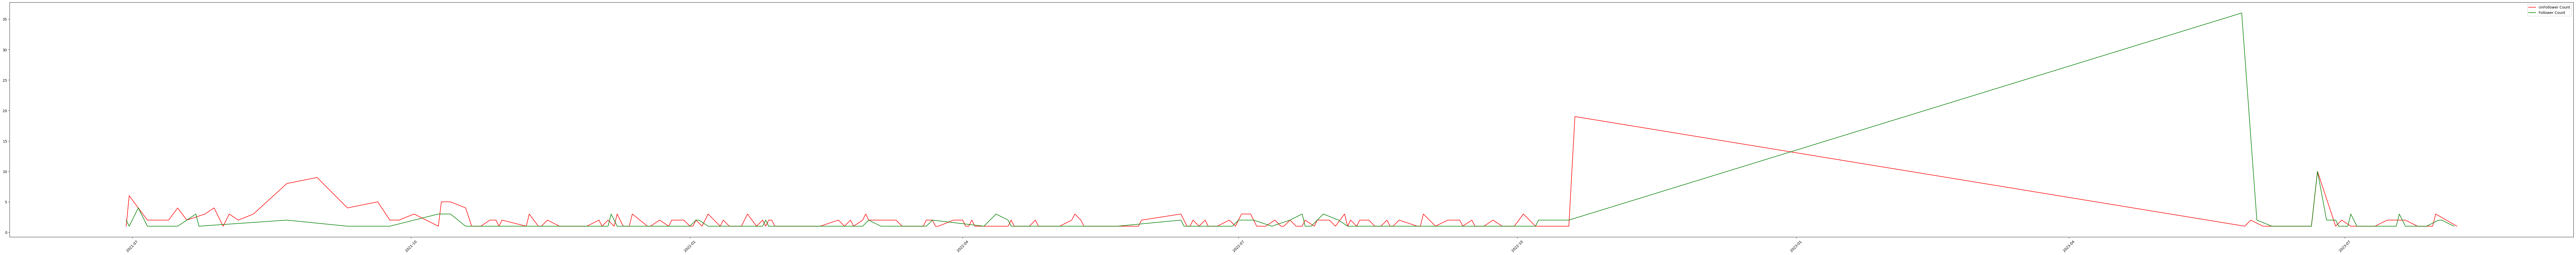

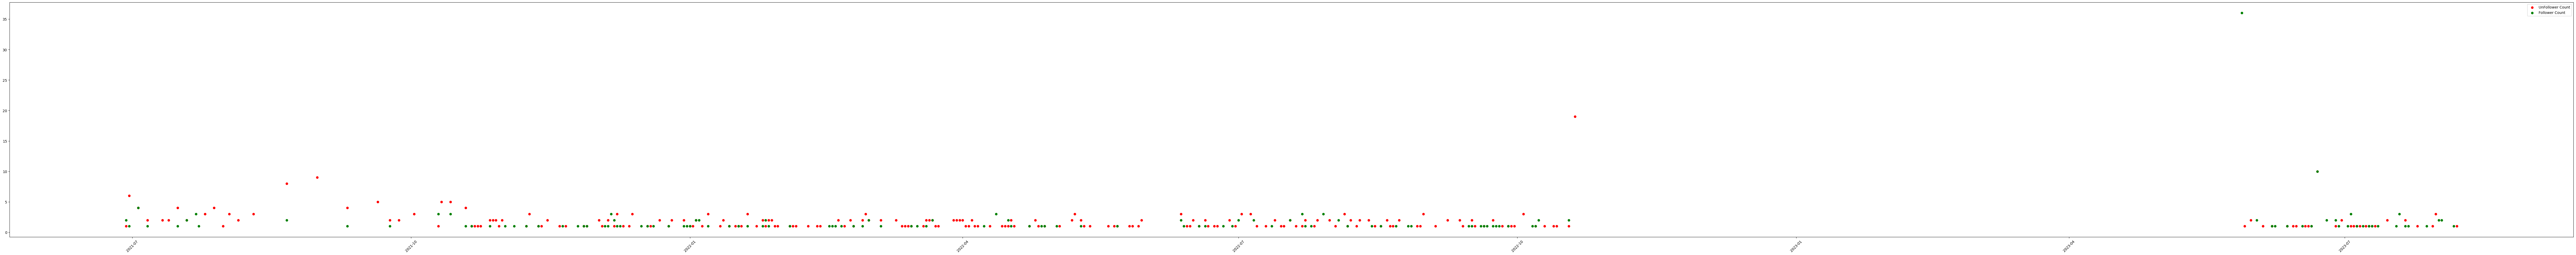

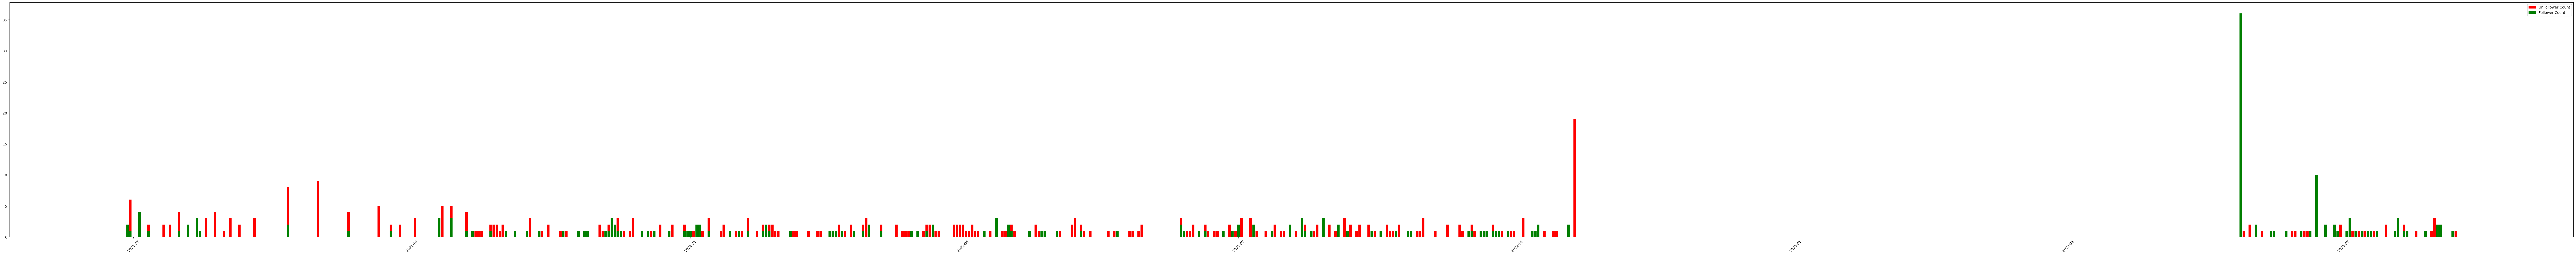

In [7]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date,col ,lit

spark = SparkSession.builder.master('local[1]').appName('Matplot').getOrCreate()

def dataFrame_plot(follower,unfollower):
  date_follower = [row.Date for row in follower.collect()]
  follower_no = [row.No_of_user for row in follower.collect()]
  date_unfollower = [row.Date for row in unfollower.collect()]
  unfollower_no = [row.No_of_user for row in unfollower.collect()]
  plt.figure(figsize=(100, 10))
  plt.plot(date_unfollower,unfollower_no,label='UnFollower Count',color='red')
  plt.plot(date_follower,follower_no,label='Follower Count',color='green')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.legend()
  plt.show()

def dataFrame_bar(follower,unfollower):
  date_follower = [row.Date for row in follower.collect()]
  follower_no = [row.No_of_user for row in follower.collect()]
  date_unfollower = [row.Date for row in unfollower.collect()]
  unfollower_no = [row.No_of_user for row in unfollower.collect()]
  plt.figure(figsize=(100, 10))
  plt.bar(date_unfollower,unfollower_no,label='UnFollower Count',color='red')
  plt.bar(date_follower,follower_no,label='Follower Count',color='green')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.legend()
  plt.show()

def dataFrame_scatter(follower,unfollower):
  date_follower = [row.Date for row in follower.collect()]
  follower_no = [row.No_of_user for row in follower.collect()]
  date_unfollower = [row.Date for row in unfollower.collect()]
  unfollower_no = [row.No_of_user for row in unfollower.collect()]
  plt.figure(figsize=(100, 10))
  plt.scatter(date_unfollower,unfollower_no,label='UnFollower Count',color='red')
  plt.scatter(date_follower,follower_no,label='Follower Count',color='green')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.legend()
  plt.show()
def clean_groupBydate(df):
  df = df.withColumn('dateadded',to_date('dateadded'))
  groupedByDate = df.groupBy('dateadded').count().sort('dateadded').select(col('dateadded').alias('Date'),col('count').alias('No_of_user'))
  groupedByDate = groupedByDate.filter(col('Date') != lit('2021-06-26'))
  return groupedByDate
df_follower = spark.read.option("header" ,"true").option("infraSchema","true").format('csv').load(path_followerlist)

df_unfollower = spark.read.option("header" ,"true").option("infraSchema","true").format('csv').load(path_unfollowerlist)

groupBydate_follower = clean_groupBydate(df_follower)
groupBydate_unfollower = clean_groupBydate(df_unfollower)

groupBydate_follower = df_follower.transform(clean_groupBydate)
groupBydate_unfollower = df_unfollower.transform(clean_groupBydate)

dataFrame_plot(groupBydate_follower,groupBydate_unfollower)
dataFrame_scatter(groupBydate_follower,groupBydate_unfollower)
dataFrame_bar(groupBydate_follower,groupBydate_unfollower)
# groupBydate_follower.show()
# groupBydate_unfollower.show()
#plt.figure(figsize=(10, 6))
# plt.figure(figsize=(100, 10))
# date_follower = [row.Date for row in groupBydate_follower.collect()]
# follower_no = [row.No_of_user for row in groupBydate_follower.collect()]

# date_unfollower = [row.Date for row in groupBydate_unfollower.collect()]
# unfollower_no = [row.No_of_user for row in groupBydate_unfollower.collect()]



# plt.plot(date_unfollower,unfollower_no,label='UnFollower Count',color='red')
# plt.plot(date_follower,follower_no,label='Follower Count',color='green')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.legend()

# plt.show()
# plt.figure(figsize=(100, 10))
# plt.scatter(date_unfollower,unfollower_no,label='UnFollower Count',color='red')
# plt.scatter(date_follower,follower_no,label='Follower Count',color='green')

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.legend()

# plt.show()

# plt.figure(figsize=(100, 10))
# plt.bar(date_unfollower,unfollower_no,label='UnFollower Count',color='red')
# plt.bar(date_follower,follower_no,label='Follower Count',color='green')

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.legend()

# plt.show()

# # #df.show()